# Photorealistic Style Transfer
---

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
import time

import torch
import torch.nn
import torch.optim as optim
from torchvision import transforms, models

import HRNET
import utils_st as utils

Checking if the system is connected with any GPU or not.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('connected device : ',device)


connected device :  cuda


Downloading the VGG19 model to use for the main cause

In [ ]:
VGG = models.vgg19(pretrained=True).features
VGG.to(device)
print(VGG)
for parameter in VGG.parameters():
    parameter.requires_grad_(False)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth



Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPo

In [ ]:
art_stn = HRNET.HRNet()
art_stn.to(device)
print(art_stn)

HRNet(
  (pass1_1): BasicBlock(
    (relu): ReLU(inplace=True)
    (identity_block): Sequential(
      (0): ConvLayer(
        (conv): Conv2d(3, 4, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): InstanceNorm2d(4, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (2): ReLU()
      (3): ConvLayer(
        (conv): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (4): InstanceNorm2d(4, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (5): ReLU()
      (6): ConvLayer(
        (conv): Conv2d(4, 16, kernel_size=(1, 1), stride=(1, 1))
      )
      (7): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (8): ReLU()
    )
    (shortcut): Sequential(
      (0): ConvLayer(
        (conv): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    )
  )
  (pass1_2): BasicBlock(
    

Now going to visualize the Content and the style images.

In [ ]:
content_path="con1.jpg"
style_path="sty1.jpg"

In [ ]:
content_image = utils.load_image(content_path) 
content_image = content_image.to(device)

style_image = utils.load_image(style_path) 
style_image = style_image.to(device)

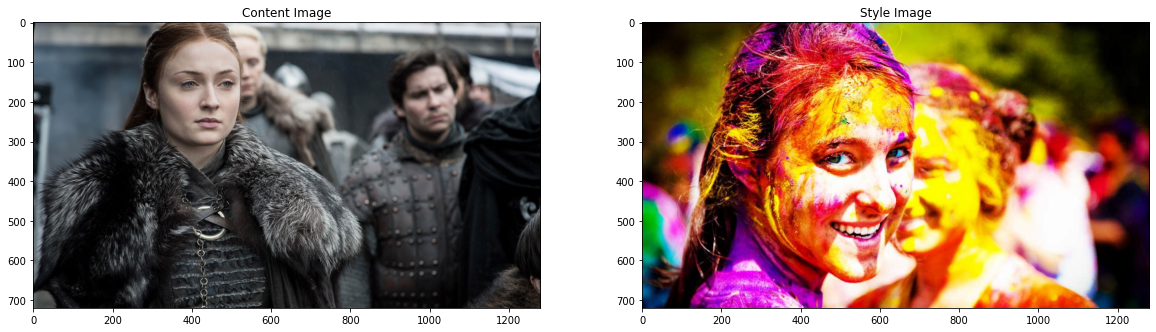

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(utils.im_convert(content_image))
ax2.imshow(utils.im_convert(style_image))
ax1.set_title('Content Image')
ax2.set_title('Style Image')
plt.show()

In [ ]:
content_features = utils.get_features(content_image, VGG)
style_features   = utils.get_features(style_image, VGG)
style_gram_matrixs = {layer: utils.get_grim_matrix(style_features[layer]) for layer in style_features}
target = content_image.clone().requires_grad_(True).to(device)

In [ ]:
style_weights = {'conv1_1': 0.1,
                 'conv2_1': 0.2,
                 'conv3_1': 0.4,
                 'conv4_1': 0.8,
                 'conv5_1': 1.6}
content_weight = 150
style_weight = 1
show_every = 100
optimizer = optim.Adam(art_stn.parameters(), lr=5e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.9)
steps = 1000
content_loss_epoch = []
style_loss_epoch = []
total_loss_epoch = []
output_image = content_image

Model fitting and optimization
---

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


After 0 criterions:
Total loss:  3232.037109375
Content loss:  6.221026420593262
Style loss:  2298.883056640625


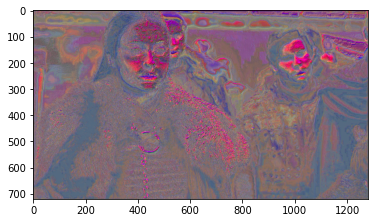

After 100 criterions:
Total loss:  292.5481872558594
Content loss:  1.3940521478652954
Style loss:  83.44036865234375


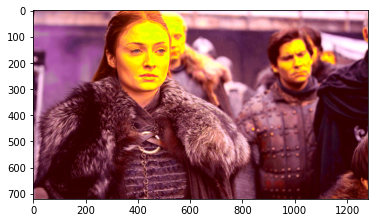

After 200 criterions:
Total loss:  247.82147216796875
Content loss:  1.0871000289916992
Style loss:  84.75646209716797


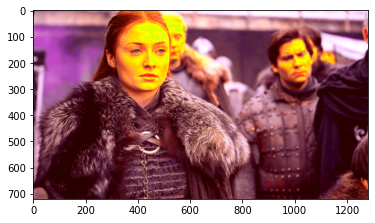

After 300 criterions:
Total loss:  230.55914306640625
Content loss:  1.020808219909668
Style loss:  77.43790435791016


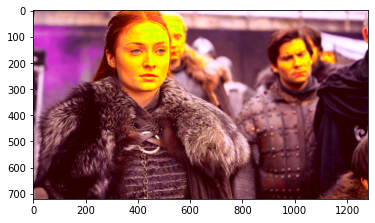

After 400 criterions:
Total loss:  211.15664672851562
Content loss:  0.9201826453208923
Style loss:  73.1292495727539


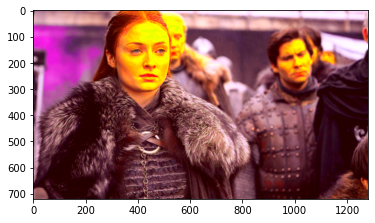

After 500 criterions:
Total loss:  206.11245727539062
Content loss:  0.8667974472045898
Style loss:  76.09283447265625


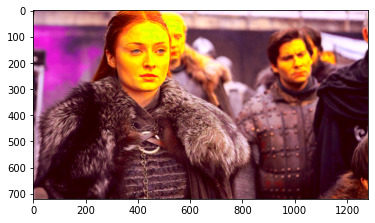

After 600 criterions:
Total loss:  191.89321899414062
Content loss:  0.7896583080291748
Style loss:  73.4444808959961


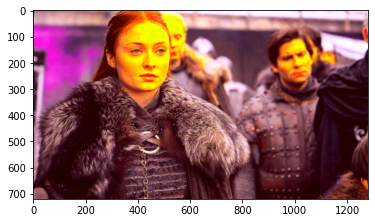

After 700 criterions:
Total loss:  187.4241180419922
Content loss:  0.7681632041931152
Style loss:  72.19963836669922


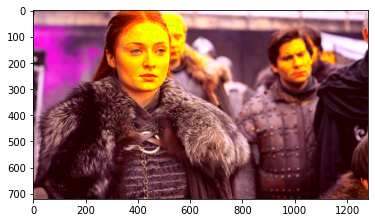

After 800 criterions:
Total loss:  180.54298400878906
Content loss:  0.7276285886764526
Style loss:  71.39869689941406


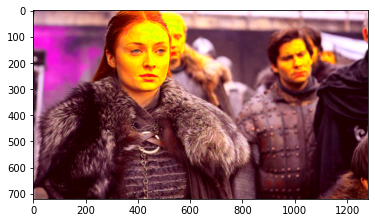

After 900 criterions:
Total loss:  176.12249755859375
Content loss:  0.7136892676353455
Style loss:  69.06909942626953


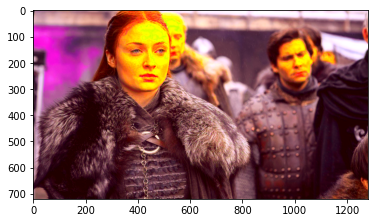

After 1000 criterions:
Total loss:  176.14767456054688
Content loss:  0.7040510177612305
Style loss:  70.5400161743164


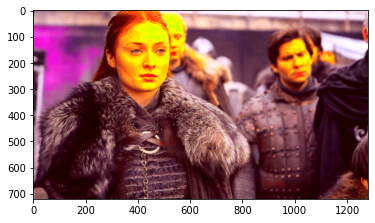

totally cost 816.7610876560211


In [ ]:
time_start=time.time()
for epoch in range(0, steps+1):
    scheduler.step()
    target = art_stn(content_image).to(device)
    target.requires_grad_(True)
    target_features = utils.get_features(target, VGG)  
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)
    style_loss = 0
    for layer in style_weights:
        target_feature = target_features[layer] 
        target_gram_matrix = utils.get_grim_matrix(target_feature)
        style_gram_matrix = style_gram_matrixs[layer]
        layer_style_loss = style_weights[layer] * torch.mean((target_gram_matrix - style_gram_matrix) ** 2)
        b, c, h, w = target_feature.shape
        style_loss += layer_style_loss / (c * h * w)
    total_loss = content_weight * content_loss + style_weight * style_loss
    total_loss_epoch.append(total_loss)
    style_loss_epoch.append(style_weight * style_loss)
    content_loss_epoch.append(content_weight * content_loss)
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    if epoch % show_every == 0:
        print("After %d criterions:" % epoch)
        print('Total loss: ', total_loss.item())
        print('Content loss: ', content_loss.item())
        print('Style loss: ', style_loss.item())
        plt.imshow(utils.im_convert(target))
        plt.show()
    output_image = target
time_end=time.time()
print('totally cost', time_end - time_start)

# Thank you :)


 Do star the repo if found helpful.